# CAR PRICE PREDICTION

In [4]:
#IMPORTING THE NECESSARY LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# LOADING THE DATA

data = pd.read_csv("car data.csv")

In [8]:
# ANALYSING THE FIRST FIVE ROWS OF DATA

data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
# CHECKING THE ROWS AND COLUMNS OF DATASET

data.shape

(301, 9)

In [11]:
#CHECKING NON-ZERO VALUES

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [13]:
import movecolumn as mc

mc.MoveToLast(data, 'Selling_Price')

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0,7.25
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0,2.85
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0,4.60
...,...,...,...,...,...,...,...,...,...
296,city,2016,11.60,33988,Diesel,Dealer,Manual,0,9.50
297,brio,2015,5.90,60000,Petrol,Dealer,Manual,0,4.00
298,city,2009,11.00,87934,Petrol,Dealer,Manual,0,3.35
299,city,2017,12.50,9000,Diesel,Dealer,Manual,0,11.50


In [14]:
# CHECKING THE MISSING VALUES

data.isnull().sum()

Car_Name         0
Year             0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Selling_Price    0
dtype: int64

In [18]:
# CHECKING THE DISTRIBUTION OF CATEGORICAL DATA
data.describe()
print(data.Fuel_Type.value_counts())
print(data.Seller_Type.value_counts())
print(data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [25]:
#ONE HOT ENCODING THE CATEGORICAL DATA

data.replace({'Fuel_Type': {'Petrol' : 0, 'Diesel': 1, 'CNG':2}},
              inplace =True)

data.replace({'Seller_Type': {'Dealer' : 0, 'Individual': 1}},
              inplace =True)

data.replace({'Transmission': {'Manual' : 0, 'Automatic': 1}},
              inplace =True)


              

In [26]:
data.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,ritz,2014,5.59,27000,0,0,0,0,3.35
1,sx4,2013,9.54,43000,1,0,0,0,4.75
2,ciaz,2017,9.85,6900,0,0,0,0,7.25
3,wagon r,2011,4.15,5200,0,0,0,0,2.85
4,swift,2014,6.87,42450,1,0,0,0,4.60


In [32]:
#SPLITING THE DATA TO TRAINING AND TEST DATA

X = data.iloc[:, 1:].drop("Selling_Price", axis=1)
y = data['Selling_Price']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.1,
                                                    random_state=2)

In [39]:
# TRAINING THE DATA

# LINEAR REGRESSION

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

#PREDICTION

train_data_pred = lin_reg.predict(X_train)
train_data_pred

array([ 3.73088505e+00,  5.60702081e+00,  7.79779356e+00, -1.88374756e+00,
        6.71614572e+00,  8.14343296e+00,  5.84067525e+00,  6.17919527e+00,
        6.15863751e+00,  1.59459051e+01,  2.15385926e+00,  1.11618544e+00,
       -4.05463414e-01,  6.69051516e+00,  6.81961414e+00,  1.02957394e+00,
        6.74306974e+00,  1.43864300e+01,  3.00001893e+00,  7.95149024e+00,
       -8.38569413e-01,  9.02067892e+00,  1.21210550e+00,  2.20040027e+00,
       -8.23744275e-01,  7.52651502e-01,  1.00142469e+01, -4.08950275e-01,
       -2.40418357e+00,  9.99845989e+00,  6.81867179e+00,  1.09249928e+00,
        4.36158792e+00,  9.20660480e-02,  3.48993776e+00,  2.78147834e+00,
        1.50401026e+00,  4.65736158e-01,  1.68679810e+00,  1.18722506e+00,
        4.32936153e+00,  6.09932798e+00,  9.51639926e-01,  7.52875828e-01,
        6.05967594e+00,  3.49453005e+00,  2.40969246e+00,  7.52230513e+00,
        4.63113915e+00,  4.44239322e+00,  4.22460259e+00,  2.71077171e+00,
        4.46881874e+00,  

In [41]:
from sklearn import metrics

error = metrics.r2_score(y_train, train_data_pred)

In [42]:
error

0.8799451660493695

In [43]:
# VISUALISING THE ERROR

Text(0, 0.5, 'Prediction Price')

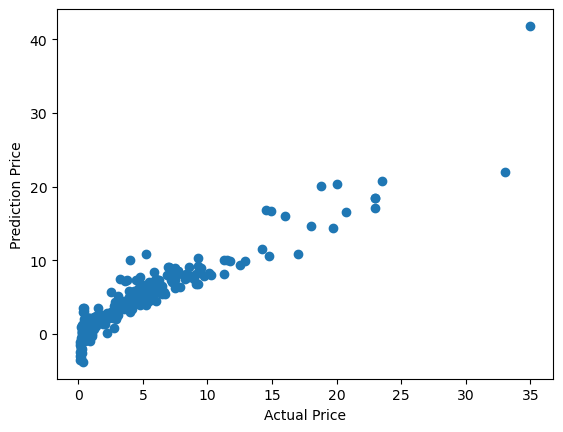

In [45]:
plt.scatter(y_train, train_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Prediction Price")


In [46]:
# TEST DATA PREDICTION

test_data_pred = lin_reg.predict(X_test)

In [47]:
from sklearn import metrics

error = metrics.r2_score(y_test, test_data_pred)

In [48]:
error

0.8365766715026903

In [49]:
# TESTING THE DATA WITH LASSO REGRESSION

from sklearn.linear_model import Lasso

In [50]:
lasso_reg = Lasso()

In [52]:
lasso_reg.fit(X_train, y_train)


Lasso()

In [53]:
test_pred = lasso_reg.predict(X_test)

In [57]:
error = metrics.r2_score(y_test, test_pred)

In [58]:
error

0.8709167941173195